[Reference](https://blog.devgenius.io/data-cleansing-in-python-common-ways-to-clean-your-data-3459a256dd85)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('titanic')

# Check missing values

In [2]:
print(df.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# Drop if almost empty

In [3]:
df = df.drop(columns=['deck'])

# Fill with simple value

In [5]:
df['age_filled_median'] = df['age'].fillna(df['age'].median())
df['age_filled_mean'] = df['age'].fillna(df['age'].mean())

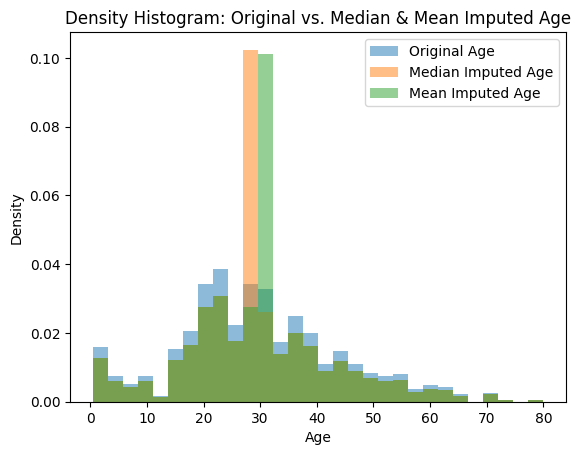

In [6]:
import matplotlib.pyplot as plt

plt.figure()

# Plot histograms with density normalization and transparency
plt.hist(df["age"].dropna(), bins=30, density=True, alpha=0.5, label="Original Age")
plt.hist(df["age_filled_median"].dropna(), bins=30, density=True, alpha=0.5, label="Median Imputed Age")
plt.hist(df["age_filled_mean"].dropna(), bins=30, density=True, alpha=0.5, label="Mean Imputed Age")

# Some labels and legend
plt.title("Density Histogram: Original vs. Median & Mean Imputed Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

#  Group-based fill


In [7]:
df['age_group_imputation_median'] = df.groupby('pclass')['age']\
               .transform(lambda x: x.fillna(x.median()))

df['age_group_imputation_mean'] = df.groupby('pclass')['age']\
               .transform(lambda x: x.fillna(x.median()))

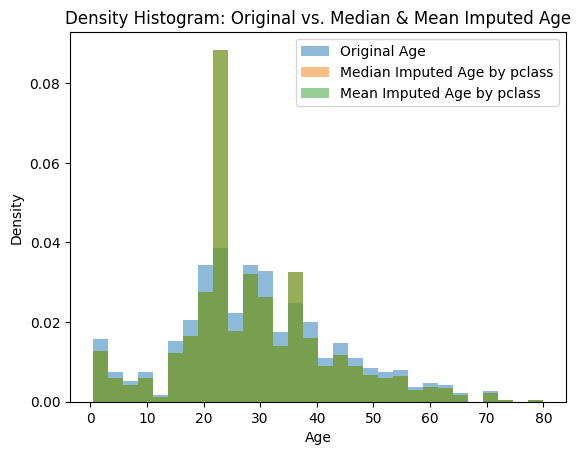

In [8]:
plt.figure()

# Plot histograms with density normalization and transparency
plt.hist(df["age"].dropna(), bins=30, density=True, alpha=0.5, label="Original Age")
plt.hist(df["age_group_imputation_median"].dropna(), bins=30, density=True, alpha=0.5, label="Median Imputed Age by pclass")
plt.hist(df["age_group_imputation_mean"].dropna(), bins=30, density=True, alpha=0.5, label="Mean Imputed Age by pclass")

# Some labels and legend
plt.title("Density Histogram: Original vs. Median & Mean Imputed Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

In [9]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


In [10]:
df['sex_upper'] = df['sex'].str.upper()

In [11]:
df['embarked_filled'] = df['embarked'].fillna('NA')
df['embarked_filled'].value_counts()

,count
embarked_filled,
S,644
C,168
Q,77
NA,2


# Find and Treat Outliers

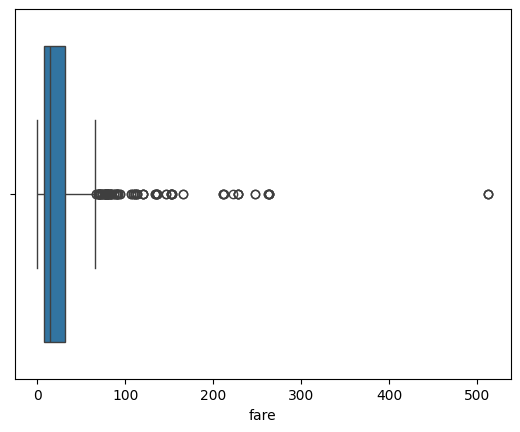

In [12]:
import matplotlib.pyplot as plt #we have imported them already, so these 2 lines are just in case
import seaborn as sns #we have imported them already, so these 2 lines are just in case

sns.boxplot(x=df['fare'])
plt.show()

In [13]:
low, high = df['fare'].quantile([0.01, 0.99])
df['fare_clipped'] = df['fare'].clip(low, high)

In [14]:
df['fare_log'] = np.log1p(df['fare'])

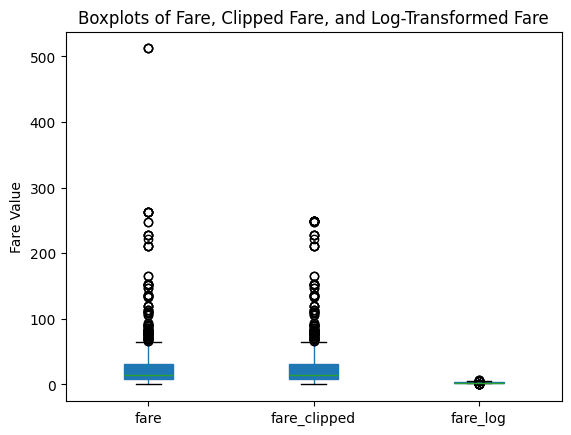

In [15]:
ax = df[['fare', 'fare_clipped', 'fare_log']].boxplot(
    grid=False,
    vert=True,
    patch_artist=True
)

# Customize labels and title
ax.set_xticklabels(['fare', 'fare_clipped', 'fare_log'])
ax.set_ylabel('Fare Value')
ax.set_title('Boxplots of Fare, Clipped Fare, and Log-Transformed Fare')

plt.show()

# Remove Duplicates

In [16]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 111


# Check Value Ranges

In [17]:
print(df['pclass'].unique())

[3 1 2]


In [18]:
bad_ages = df[(df['age'] < 0) | (df['age'] > 100)]
print("Bad ages:", bad_ages.shape[0])

Bad ages: 0


# Clean Text Columns

In [19]:
df['embark_town'] = df['embark_town']\
    .str.strip()\
    .str.title()

/tmp/ipython-input-19-617957443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embark_town'] = df['embark_town']\


# Cross-Check Related Columns


In [20]:
mismatch = df[(df['adult_male']) &
              ((df['age'] < 18) | (df['sex'] != 'male'))]
print("Mismatches:", mismatch.shape[0])

Mismatches: 16


# Scale Numeric Features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age_scaled','fare_scaled']] = scaler\
    .fit_transform(df[['age','fare']])

/tmp/ipython-input-21-4277704492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age_scaled','fare_scaled']] = scaler\
/tmp/ipython-input-21-4277704492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age_scaled','fare_scaled']] = scaler\
